In [3]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import sys
sys.path.append("../../../analysisTools/")
from analysisTools import Analyzer
from analysisTools import loadSchema
import analysisTools as tools
import analysisSubroutines as routines
import plotTools as ptools
import utils
import importlib
import coffea.util as util
import time
import json
import os
import glob
import pandas as pd
import mplhep as hep

### Import coffea files

In [4]:
prefix = './coffea/'
suffix = '_dPhi-1to2_NJet3to4'

In [5]:
bkg_histo = util.load(f'{prefix}/background_VR{suffix}.coffea')[0]

In [6]:
data_histo = util.load(f'{prefix}/data_VR{suffix}.coffea')[0]

In [7]:
sig_histo = util.load(f'{prefix}/signal_VR{suffix}.coffea')[0]

In [8]:
utils.get_signal_list_of_cuts(sig_histo)

['Preselections',
 'n(good vertex) > 0',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 '1.0 < dPhi(MET,leading jet) < 2.0']

### Efficiency

In [9]:
df_signal = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
df_signal

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"1.0 < dPhi(MET,leading jet) < 2.0"
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,0.171096,0.000496,0.000198,0.000184,0.000184,0.0
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,4.581923,0.015995,0.006673,0.005336,0.005336,0.0
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,3.476254,0.022606,0.008239,0.008090,0.008090,0.0
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.394714,0.177395,0.082490,0.079381,0.079381,0.0
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,0.221679,0.000783,0.000371,0.000288,0.000288,0.0
...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,34.229723,0.126400,0.051790,0.051790,0.051790,0.0
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,22398.718783,98.642425,42.224691,37.539692,37.539692,0.0
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,933.552910,3.376123,1.477324,1.265150,1.265150,0.0
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,3.613831,0.012042,0.005475,0.004819,0.004819,0.0


In [10]:
df_signal = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched')
df_signal

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"1.0 < dPhi(MET,leading jet) < 2.0"
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,1.0,0.942796,1.000000,1.000000,1.000000,NaN
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,1.0,0.958292,0.950024,0.937511,0.937511,NaN
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,1.0,0.966878,1.000000,1.000000,1.000000,NaN
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,1.0,0.964890,0.981081,0.980340,0.980340,NaN
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,1.0,0.947380,0.888854,0.857139,0.857139,NaN
...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1,1.0,0.967147,1.000000,1.000000,1.000000,NaN
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,1.0,1.000000,1.000000,1.000000,1.000000,NaN
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,1.0,1.000000,1.000000,1.000000,1.000000,NaN
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,1.0,0.963669,1.000000,1.000000,1.000000,NaN


In [11]:
df_bkg = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
df_bkg

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"1.0 < dPhi(MET,leading jet) < 2.0"
ZGamma,0.045482,0.000102,0.000025,0.000011,0.000011,0.000000
QCD,46635.033957,158.399462,55.043823,55.043823,55.043823,0.000000
DY,3986.522297,16.892044,10.135226,10.135226,10.135226,0.000000
WJets,170013.294072,359.321738,201.021545,190.654577,190.304988,2.816332
ZJets,49771.904314,152.749765,92.570621,86.984753,85.456190,1.537267
Multiboson,4489.247271,11.410078,5.638927,5.080829,4.789866,0.222017
Top,16299.756491,74.135889,33.306002,32.614447,32.614447,0.000000
Total,291195.803884,772.909077,397.716170,380.513666,378.344551,4.575616


In [12]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df['1.0 < dPhi(MET,leading jet) < 2.0']).transpose(), pd.DataFrame(bkg_cts_raw_df['1.0 < dPhi(MET,leading jet) < 2.0']).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,ZGamma,QCD,DY,WJets,ZJets,Multiboson,Top,Total
Weighted Counts,0.00,0.00,0.00,2.82,1.54,0.22,0.00,4.58
Raw Counts,0.00,0.00,0.00,40.00,52.00,2.00,0.00,94.00


In [13]:
pd.options.display.float_format = '{:,.1f}'.format

utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')

,Preselections,n(good vertex) > 0,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"1.0 < dPhi(MET,leading jet) < 2.0"
data_2018_Data_MET_UL18_Run2018D,"307,259.0",864.0,347.0,291.0,288.0,3.0
data_2018_Data_MET_UL18_Run2018B,"61,151.0",151.0,54.0,45.0,44.0,1.0
data_2018_Data_MET_UL18_Run2018C,"69,359.0",221.0,86.0,71.0,71.0,3.0
data_2018_Data_MET_UL18_Run2018A,"118,155.0",338.0,117.0,93.0,91.0,2.0


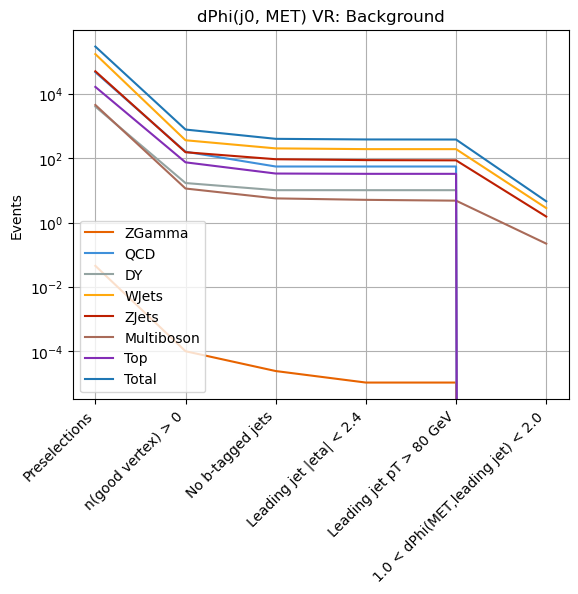

In [14]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

ptools.plot_bkg_efficiency(bkg_histo, df, doLog = True, ylabel = 'Events', title = 'dPhi(j0, MET) VR: Background')

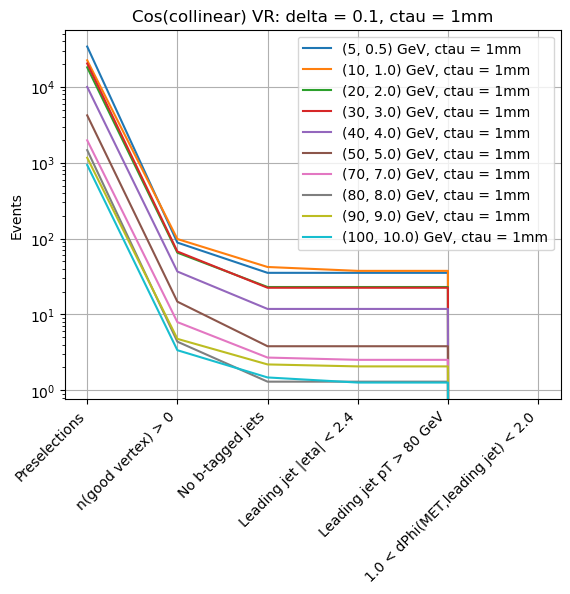

In [15]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.1]
ctaus = [1]

title = f'Cos(collinear) VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

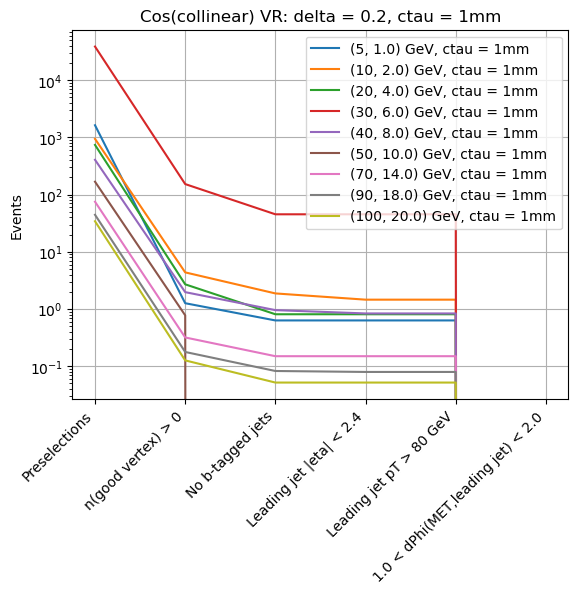

In [16]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.2]
ctaus = [1]

title = f'Cos(collinear) VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

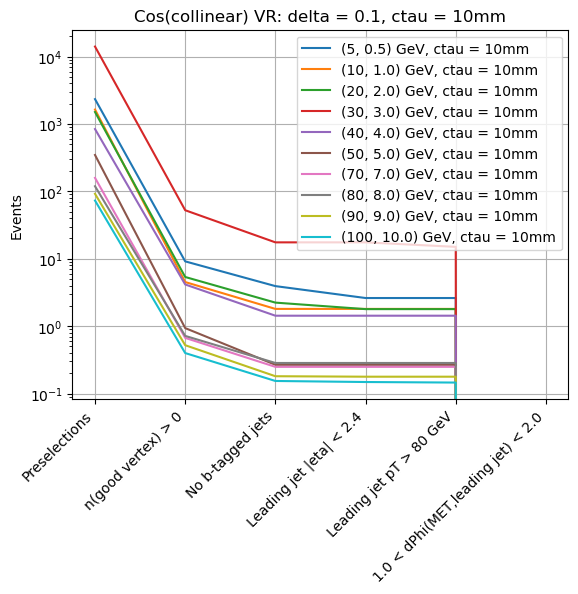

In [17]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.1]
ctaus = [10]

title = f'Cos(collinear) VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

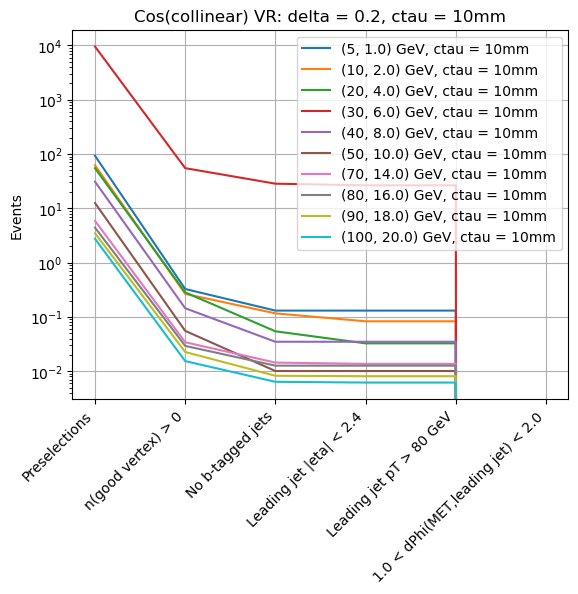

In [18]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.2]
ctaus = [10]

title = f'Cos(collinear) VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

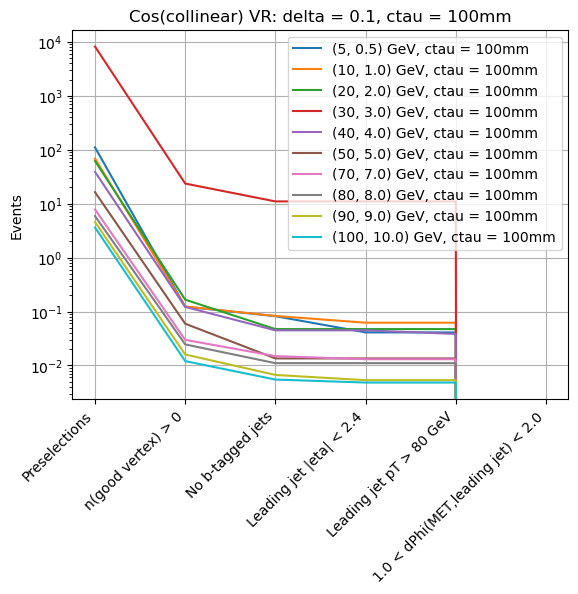

In [19]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.1]
ctaus = [100]

title = f'Cos(collinear) VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

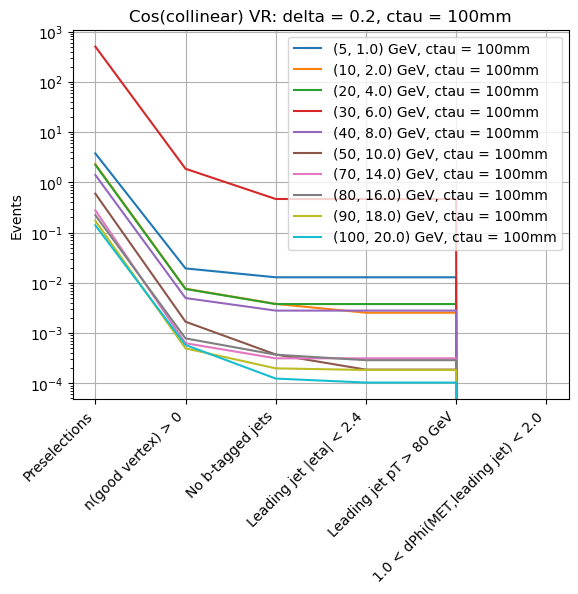

In [20]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

m1s = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100]
deltas = [0.2]
ctaus = [100]

title = f'Cos(collinear) VR: delta = {deltas[0]}, ctau = {ctaus[0]}mm'
ptools.plot_signal_efficiency(sig_histo, df, m1s, deltas, ctaus, doLog = True, ylabel = 'Events', title = title)

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


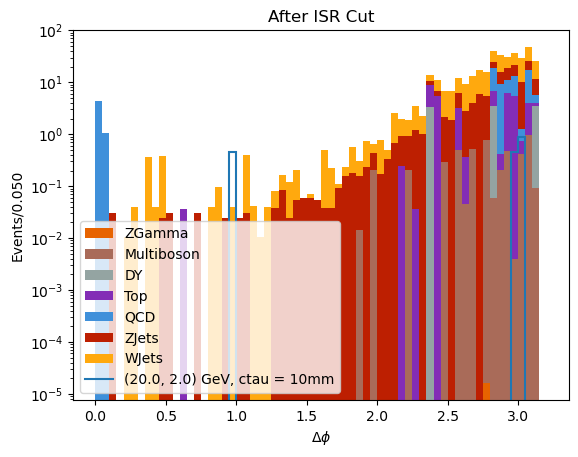

In [21]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'lead_jet_met_dPhi',
    'cut': 'cut7',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histo, plot_dict, style_dict, isLegacy = False)

# signal points
m1s = [20]
deltas = [0.1]
ctaus = [10]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(ax, sig_histo, m1, delta, ctau, plot_dict, style_dict)

plt.title('After ISR Cut')
plt.legend()
plt.show()

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/mplhep/utils.py:199: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


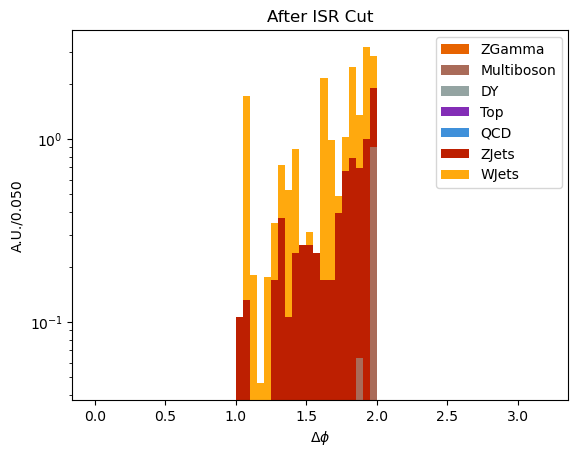

In [23]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'lead_jet_met_dPhi',
    'cut': 'cut8',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histo, plot_dict, style_dict, isLegacy = False)

plt.title('After ISR Cut')
plt.legend()
plt.show()

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


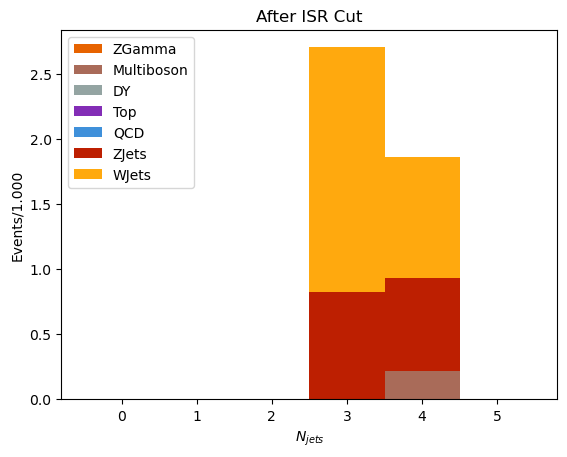

In [25]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nJets',
    'cut': 'cut8',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,6],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histo, plot_dict, style_dict, isLegacy = False)


plt.title('After ISR Cut')
plt.legend()
plt.show()

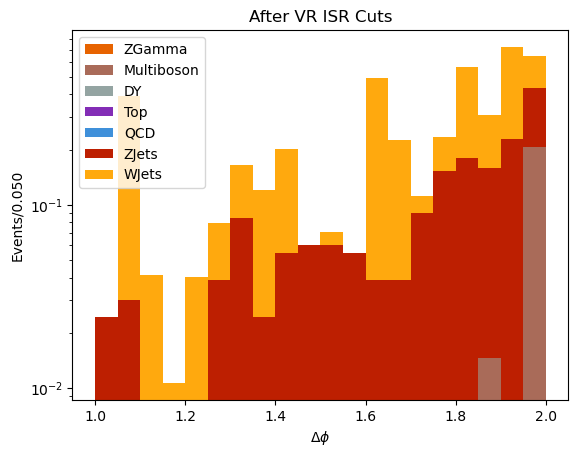

In [26]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'lead_jet_met_dPhi',
    'cut': 'cut8',
}

style_dict = {
    'rebin': 1j,
    'xlim': [1,2],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histo, plot_dict, style_dict, isLegacy = False)

plt.title('After VR ISR Cuts')
plt.legend()
plt.show()

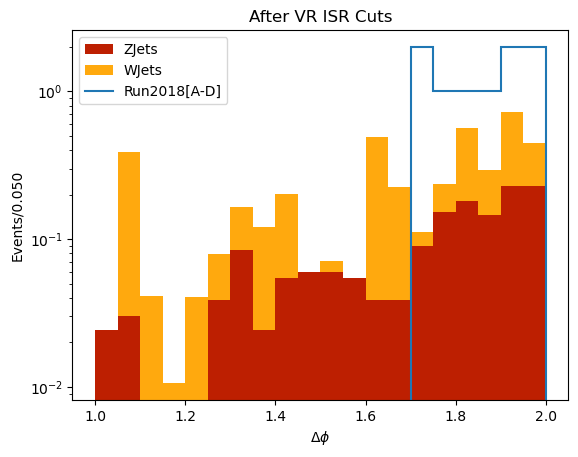

In [27]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'lead_jet_met_dPhi',
    'cut': 'cut8',
}

style_dict = {
    'rebin': 1j,
    'xlim': [1,2],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histo, plot_dict, style_dict, processes = ['WJets', 'ZJets'], isLegacy = False)

ptools.plot_data_1d(ax, data_histo, plot_dict, style_dict)

plt.title('After VR ISR Cuts')
plt.legend()
plt.show()

/uscms/home/kyungmip/nobackup/miniconda3/envs/coffea/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


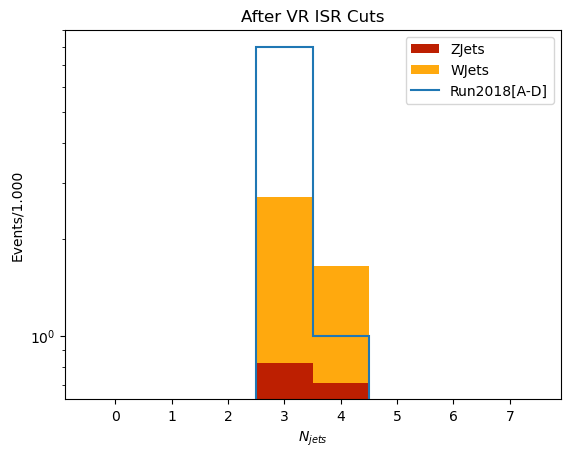

In [28]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nJets',
    'cut': 'cut8',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
ptools.plot_bkg_1d(ax, bkg_histo, plot_dict, style_dict, processes = ['WJets', 'ZJets'], isLegacy = False)

ptools.plot_data_1d(ax, data_histo, plot_dict, style_dict)

plt.title('After VR ISR Cuts')
plt.legend()
plt.show()